<a href="https://colab.research.google.com/github/ydatta/datafile/blob/main/22_05_17_P_Session_16_VAR_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. imported pandas for uploading github data file in colab

In [ ]:
import pandas as pd

In [ ]:
filepath='https://raw.githubusercontent.com/ydatta/Econometrics-data/main/VARdata1.csv?token=GHSAT0AAAAAABUUOZ76C7JPCSXURAZI2H3EYUDRANQ'

In [ ]:
macro_data=pd.read_csv(filepath,parse_dates=['TIME'],index_col='TIME')

In [ ]:
macro_data.head()

,M3,GDP,CPI
TIME,,,
1970-71,10326,644389,38
1971-72,11814,654976,39
1972-73,13746,651352,42
1973-74,16474,672818,51
1974-75,18717,680793,64


HENCEFORTH WE WILL CONSIDER ONLY M3 & GDP VARIABLES FOR THE ANALYSIS

2. Stationarity check of the data with Augmented Dicky Fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
print('p value for original M3')
adfuller(macro_data.M3)[1]

p value for original M3


0.6666931288382311

0.6666 > 0.05 so we need to check stationarity of M3 with first order differencing

In [ ]:
print('p value for first order differencing M3')
adfuller(macro_data.M3.diff()[1:])[1]

p value for first order differencing M3


1.0

In [ ]:
print('p value for second order differencing M3')
adfuller(macro_data.M3.diff().diff()[2:])[1]

p value for second order differencing M3


0.9981026630938307

In [ ]:
print('p value for original GDP')
adfuller(macro_data.GDP)[1]

p value for original GDP


1.0

In [ ]:
print('p value for first order differencing GDP')
adfuller(macro_data.GDP.diff()[1:])[1]

p value for first order differencing GDP


0.99905962502754

In [ ]:
print('p value for second order differencing GDP')
adfuller(macro_data.GDP.diff().diff()[2:])[1]

p value for second order differencing GDP


5.308906895754002e-05

p value for second order differencing GDP is 0.03 < 0.05 so second order differncing GDP is stationary

3. Building only M3 & GDP data table 

In [ ]:
macro_data1=macro_data[['M3','GDP']]

In [ ]:
macro_data1.tail()

,M3,GDP
TIME,,
2000-01,1224087,2554004
2001-02,1420007,2680280
2002-03,1647954,2785013
2003-04,1861580,3006254
2004-05,2121459,3242209


4. Spliting the data of macro_data1 into train & test where train data is used for analysis and test data is used for prediction

In [ ]:
train_dt=macro_data1[:-4]
test_dt=macro_data1[-4:]

In [ ]:
train_dt.tail()

,M3,GDP
TIME,,
1996-97,642631,2049786
1997-98,752028,2132798
1998-99,901294,2264699
1999-00,1056025,2456363
2000-01,1224087,2554004


In [ ]:
test_dt

,M3,GDP
TIME,,
2001-02,1420007,2680280
2002-03,1647954,2785013
2003-04,1861580,3006254
2004-05,2121459,3242209


5. lag determination with AIC test
for this purpose we need to import VAR for select order of lags

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
model=VAR(train_dt.diff()[1:])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
VAR_sol=model.select_order(maxlags=20)

In [ ]:
print(VAR_sol.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        42.77       42.83   3.747e+18       42.70
1        40.74       40.92   5.120e+17       40.54
2        40.50       40.80   4.723e+17       40.17
3        40.66       41.08   8.884e+17       40.19
4        3.532       4.077       337.3       2.935
5       -87.45      -86.78   5.695e-38      -88.18
6       -85.28      -84.49   2.995e-38      -86.14
7       -85.76      -84.85   3.520e-39      -86.76
8       -80.82      -79.79   1.315e-37      -81.95
9      -88.66*     -87.51*   1.629e-41     -89.92*
10      -82.72      -81.45   2.125e-39      -84.11
11      -84.35      -82.96   1.512e-40      -85.88
12      -84.78      -83.27   3.746e-41      -86.44
13      -85.07      -83.43  1.100e-41*      -86.86
14      -82.25      -80.50   7.322e-41      -84.18
15      -78.09      -76.22   1.909e-39      -80.15
16      -80.65      -78.65   6.

6. Now, to run actual vector auto regression with 9 lags we need to import VARMAX library & run the VARMAX 

we also import warnings for ignoring warnings

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
FVM=VARMAX(train_dt.diff()[1:],order=(9,0))

In [ ]:
fitted_model=FVM.fit(disp=False)

In [ ]:
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:          ['M3', 'GDP']   No. Observations:                   30
Model:                         VAR(9)   Log Likelihood               -1057.502
                          + intercept   AIC                           2197.005
Date:                Tue, 17 May 2022   BIC                           2254.454
Time:                        12:59:04   HQIC                          2215.383
Sample:                             0                                         
                                 - 30                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                         nan   Jarque-Bera (JB):           0.69, 0.36
Prob(Q):                               nan   Prob(JB):                   0.71, 0.83
Heteroskedasticity (H):         2.11, 2.55   Skew:                      0.03, -0.25
Prob(H) (two-sided):            0.25,

7. Forecasting

In [ ]:
n_forecast=4
predict=fitted_model.get_prediction(start=len(train_dt),end=len(train_dt)+n_forecast)

In [ ]:
predictions=predict.predicted_mean

In [ ]:
predictions.coloumns=['M3_predicted','GDP_predicted']
predictions

,M3,GDP
31,253035.838731,443655.781316
32,277258.501802,475382.104459
33,296109.964293,537018.128670
34,307556.289833,604539.348989
35,270982.785672,472470.690495


In [ ]:
predictions

,M3,GDP
31,253035.838731,443655.781316
32,277258.501802,475382.104459
33,296109.964293,537018.128670
34,307556.289833,604539.348989
35,270982.785672,472470.690495


In [ ]:
TvP=pd.concat([test_dt,predictions],axis=1)

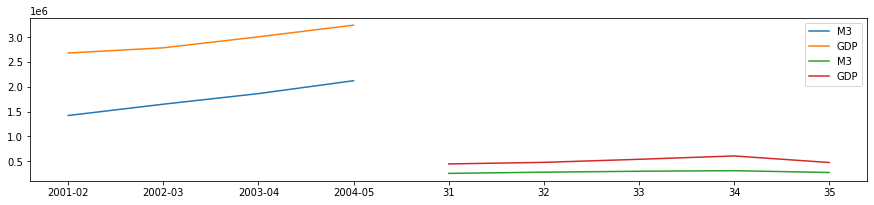

In [ ]:
TvP.plot(figsize=(15,3))